In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head(5)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.shape

(136429, 14)

In [4]:
df.dtypes

id                           int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [5]:
df.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [6]:
for i in df.columns:
    print("{0}: {1}".format(i, df[i].nunique()))

id: 136429
Product ID: 9976
Type: 3
Air temperature [K]: 95
Process temperature [K]: 81
Rotational speed [rpm]: 952
Torque [Nm]: 611
Tool wear [min]: 246
Machine failure: 2
TWF: 2
HDF: 2
PWF: 2
OSF: 2
RNF: 2


In [7]:
df['Machine failure'].value_counts()

0    134281
1      2148
Name: Machine failure, dtype: int64

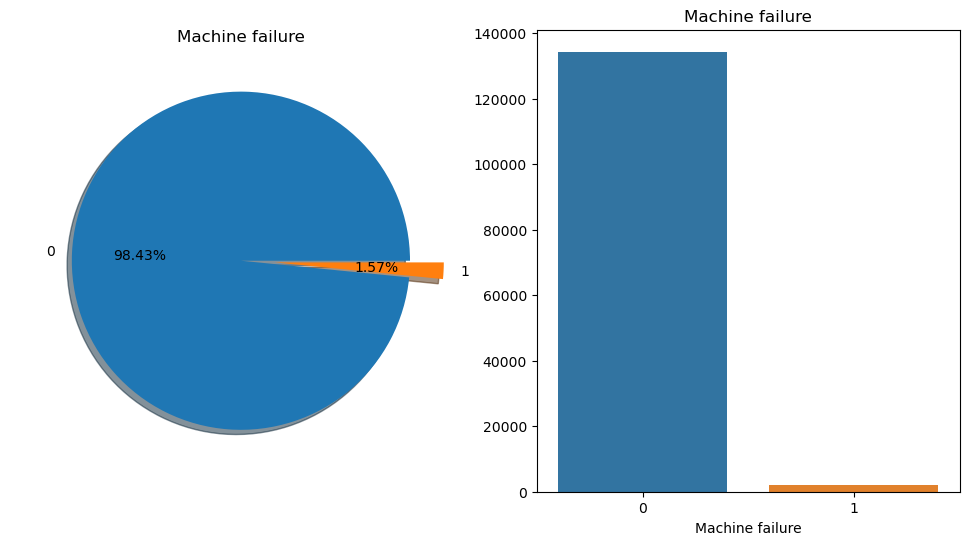

In [8]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

df['Machine failure'].value_counts().plot.pie(autopct = '%0.2f%%', explode = [0, 0.2], shadow = True,
                                             ax = ax[0])
ax[0].set_title("Machine failure")
ax[0].set_ylabel(' ')

sns.countplot(x = 'Machine failure', data = df, ax = ax[1])
ax[1].set_title("Machine failure")
ax[1].set_ylabel(' ')
plt.show()

_Из всего списка, лишь у 1.6% машин был отказ._

In [9]:
df_failure = df[df['Machine failure']==1].copy()

In [10]:
df_nf = df[df['Machine failure']==0].copy()

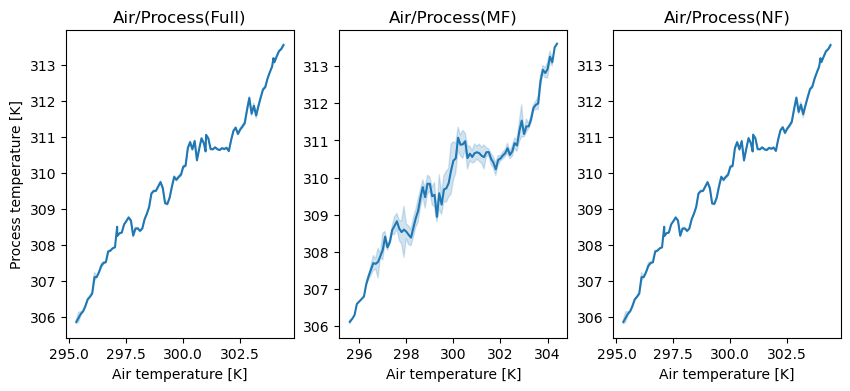

In [11]:
fig, ax = plt.subplots(1, 3, figsize = (10,4))

sns.lineplot(x = 'Air temperature [K]', y = 'Process temperature [K]', data= df, ax = ax[0])
ax[0].set_title("Air/Process(Full)")

sns.lineplot(x = 'Air temperature [K]', y = 'Process temperature [K]', data = df_failure, ax = ax[1])
ax[1].set_title('Air/Process(MF)')
ax[1].set_ylabel(' ')

sns.lineplot(x = 'Air temperature [K]', y = 'Process temperature [K]', data = df_nf, ax = ax[2])
ax[2].set_title("Air/Process(NF)")
ax[2].set_ylabel(' ')
plt.show()

_Температура воздуха от процесса особо не отличается_

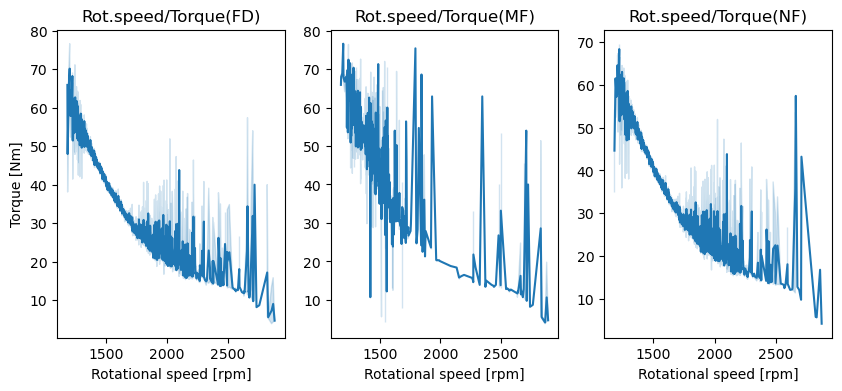

In [12]:
fig, ax = plt.subplots(1,3, figsize = (10, 4))

sns.lineplot(data = df, x = 'Rotational speed [rpm]', y = 'Torque [Nm]', ax = ax[0])
ax[0].set_title('Rot.speed/Torque(FD)')

sns.lineplot(data = df_failure, x = 'Rotational speed [rpm]', y = 'Torque [Nm]', ax = ax[1])
ax[1].set_title('Rot.speed/Torque(MF)')
ax[1].set_ylabel(' ')

sns.lineplot(data = df_nf, x = 'Rotational speed [rpm]', y = 'Torque [Nm]', ax = ax[2])
ax[2].set_title('Rot.speed/Torque(NF)')
ax[2].set_ylabel(' ')

plt.show()

_При уменьшении крутящего момента скорость вращения начинает возрастать_

_На втором графике(MF) видны сильные скачки крутящего момента_

_На крайнем правом графике они тоже присутствуют, но значительно меньше_

***Необходимо построить корреляционную таблицу, для лучшего понимания зависимостей***

C:\Users\NATALIE\AppData\Local\Temp\ipykernel_5676\269095388.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(df.corr())
C:\Users\NATALIE\AppData\Local\Temp\ipykernel_5676\269095388.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap='RdYlGn', linewidths=0.5, annot_kws={"size":7}, mask = mask)


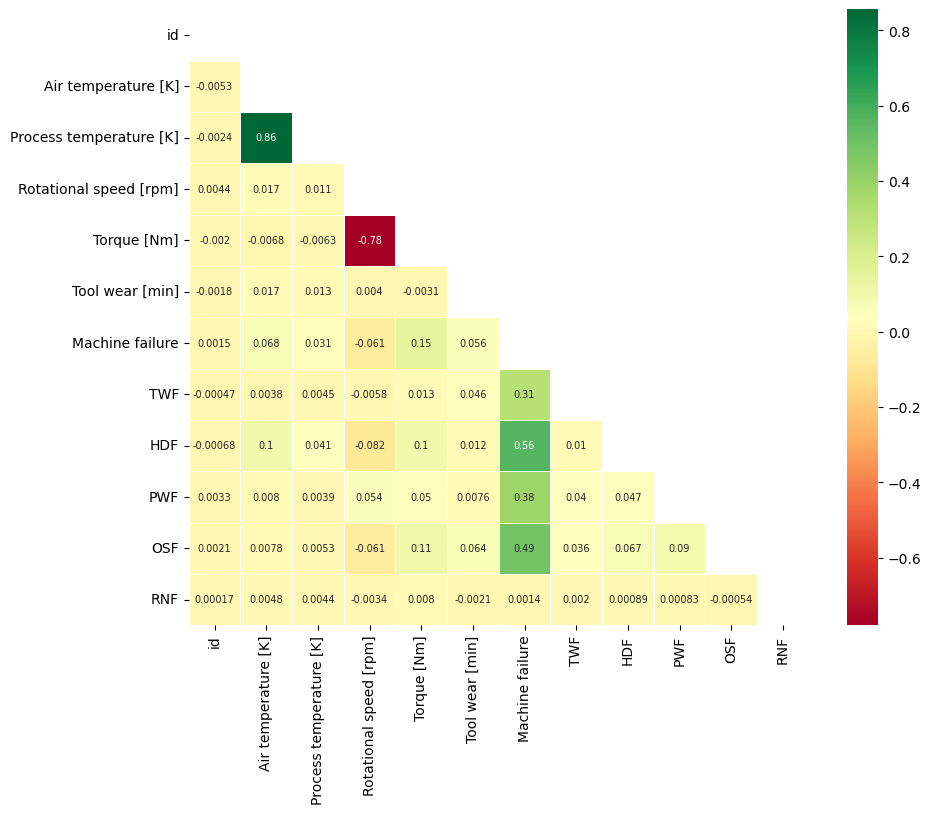

In [13]:
fig = plt.figure(figsize=(10,8))
mask = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, cmap='RdYlGn', linewidths=0.5, annot_kws={"size":7}, mask = mask)
plt.show()

_Основыные признаки, с которыми коррелирует выход машины из строя это как раз причины неисправности_

_Самыми распространенными причинами являются рассеивание тепла(HDF) и перенапряжение (OSF), случайные причины отказа (RNF), встречаются довольно редко_

_Необходимо посмотреть распределение по причинам отказа_

In [14]:
df_cat = df.iloc[:, 8:14]
for i in df_cat.columns:
    print(df_cat[i].value_counts())

0    134281
1      2148
Name: Machine failure, dtype: int64
0    136217
1       212
Name: TWF, dtype: int64
0    135725
1       704
Name: HDF, dtype: int64
0    136102
1       327
Name: PWF, dtype: int64
0    135889
1       540
Name: OSF, dtype: int64
0    136121
1       308
Name: RNF, dtype: int64


In [15]:
df.Type.value_counts()

L    95354
M    32152
H     8923
Name: Type, dtype: int64

In [16]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [17]:
df_failure

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
130,130,L52498,L,303.9,312.8,1345,56.5,21,1,0,0,0,0,0
164,164,L51721,L,302.5,310.4,1307,54.8,174,1,0,1,0,0,0
228,228,M17895,M,300.7,309.7,1878,27.9,20,1,0,0,0,0,0
236,236,L55926,L,297.3,308.6,1258,61.8,144,1,0,0,0,1,0
247,247,L51801,L,303.0,311.3,1341,51.0,174,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135902,135902,L52669,L,302.6,312.1,1638,35.0,215,1,1,0,0,0,0
135917,135917,L56200,L,297.3,308.2,1553,33.5,208,1,1,0,0,0,0
135957,135957,L55410,L,299.1,310.6,1353,49.7,74,1,0,0,0,0,0
136053,136053,H34965,H,302.4,312.0,1286,62.3,162,1,0,0,1,0,0


In [18]:
pd.crosstab([df.TWF, df.HDF, df.PWF, df.OSF, df.RNF], df['Machine failure']).style.background_gradient(cmap = 'summer_r')

_Немного странная таблица получилась, но по ней можно будет посмотреть причины отказов_

_было зафиксировано 507 отказов без причины_

_Так же можно заметить, что если встречается больше чем одна причина отказа, происходит отказ всей машины_

_Очень странно, что при сбое в рассеивании тепла 6 машин не прекращали свою работу, на мой взгляд, перегрев это очень серьезная причина для отказа_

In [19]:
df['Fail'] = 0
df.loc[(df.TWF+df.HDF + df.PWF + df.OSF + df.RNF)<1, 'Fail'] = 0
df.loc[(df.TWF+df.HDF + df.PWF + df.OSF + df.RNF)==1, 'Fail'] = 1
df.loc[(df.TWF+df.HDF + df.PWF + df.OSF + df.RNF)>1, 'Fail'] = 2
df.loc[(df.TWF==0)&(df.HDF==0)&(df.PWF ==0)&(df.OSF ==0)&(df.RNF==1), 'Fail']=0.5

In [20]:
df.Fail.sum()

1933.5

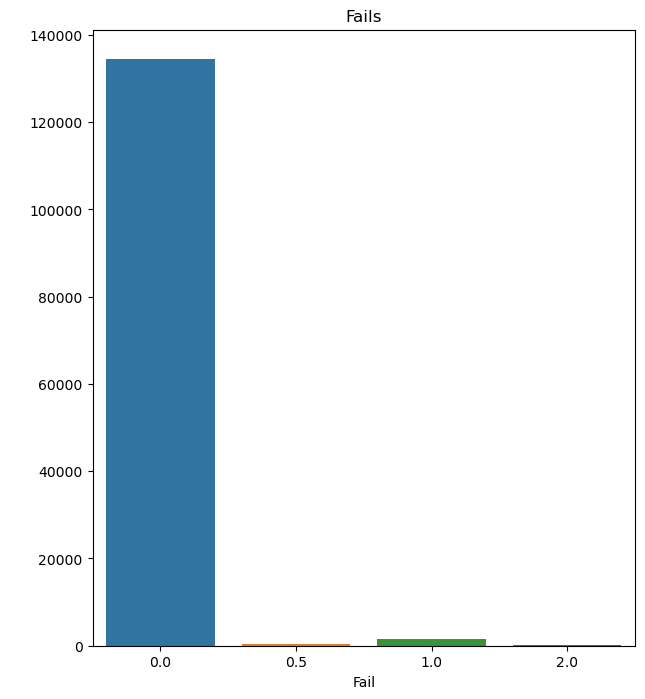

In [21]:
plt.figure(figsize = (7,8))
sns.countplot(x = 'Fail', data = df)
plt.title('Fails')
plt.ylabel(' ')
plt.show()

In [22]:
df.head(5)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Fail
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0.0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0.0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0.0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0.0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0.0


_Теперь интересно посмотреть, по какой причине некоторые сбои не приводят к сбою всей машины_

**OSF**

In [23]:
df_osf = df[(df.TWF==0)&(df.HDF==0)&(df.PWF ==0)&(df.OSF ==1)&(df.RNF==0)]
df_osf[df_osf['Machine failure']==0]

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Fail
12540,12540,L54263,L,300.7,310.4,1416,61.8,209,0,0,0,0,1,0,1.0
101163,101163,L52241,L,304.0,312.9,1363,62.5,200,0,0,0,0,1,0,1.0
118454,118454,L53258,L,300.8,310.7,1339,59.1,203,0,0,0,0,1,0,1.0
122378,122378,L53258,L,300.8,310.7,1339,59.1,203,0,0,0,0,1,0,1.0


In [24]:
df_osf[df_osf['Machine failure']==1].head(7)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Fail
236,236,L55926,L,297.3,308.6,1258,61.8,144,1,0,0,0,1,0,1.0
661,661,L53258,L,300.8,310.7,1362,59.1,203,1,0,0,0,1,0,1.0
1027,1027,L51819,L,303.1,311.2,1373,48.8,212,1,0,0,0,1,0,1.0
1613,1613,L56264,L,297.2,307.9,1381,62.4,172,1,0,0,0,1,0,1.0
1882,1882,L56843,L,299.1,310.1,1335,48.8,204,1,0,0,0,1,0,1.0
2171,2171,L55686,L,298.4,309.6,1710,52.7,163,1,0,0,0,1,0,1.0
2656,2656,L48514,L,298.7,310.4,1365,49.1,226,1,0,0,0,1,0,1.0


Text(0.5, 1.0, '')

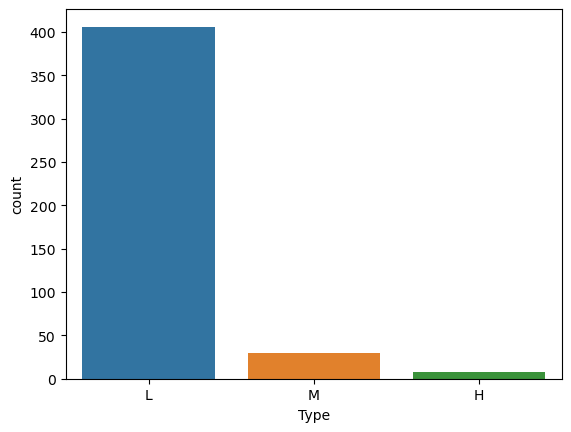

In [25]:
sns.countplot(x = df_osf[df_osf['Machine failure']==1].Type)
plt.title('')

_Из типа вряд ли удастся что-то получить_

_В целом, показатели у тех 4х машин, у которых перенапряжение не привело к сбою их работы ничем не отличаются от тех, что отключились, это скорее какое-то исключение_

**PWF**

In [26]:
df_pwf = df_osf = df[(df.TWF==0)&(df.HDF==0)&(df.PWF ==1)&(df.OSF ==0)&(df.RNF==0)]
df_pwf[df_pwf['Machine failure']==0]

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Fail
50475,50475,L54191,L,300.5,310.5,2633,12.2,127,0,0,0,1,0,0,1.0
116370,116370,L47643,L,297.4,308.7,2874,4.2,118,0,0,0,1,0,0,1.0
119486,119486,M15973,M,296.6,307.4,1790,25.8,72,0,0,0,1,0,0,1.0


In [27]:
df_pwf[df_pwf['Machine failure']==1].head(7)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Fail
1044,1044,M20475,M,303.0,312.3,1488,71.3,175,1,0,0,1,0,0,1.0
1285,1285,M17739,M,300.6,309.4,1367,63.2,2,1,0,0,1,0,0,1.0
1796,1796,L47184,L,298.2,308.6,1268,68.2,81,1,0,0,1,0,0,1.0
2891,2891,L53319,L,300.8,310.7,1386,63.5,76,1,0,0,1,0,0,1.0
2988,2988,L54886,L,300.7,311.5,1452,59.1,19,1,0,0,1,0,0,1.0
3161,3161,L51169,L,302.4,311.2,1402,59.1,127,1,0,0,1,0,0,1.0
3856,3856,M19269,M,302.4,310.1,2861,4.0,200,1,0,0,1,0,0,1.0


_Снова ничего выдающегося, возможно продолжене работы связано с каки-то резервным источником питания_

**HDF**

In [28]:
df_hdf = df[(df.TWF==0)&(df.HDF==1)&(df.PWF ==0)&(df.OSF ==0)&(df.RNF==0)]
df_hdf[df_hdf['Machine failure']==0]

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Fail
6632,6632,M18096,M,300.8,309.4,1342,62.4,9,0,0,1,0,0,0,1.0
8083,8083,M18096,M,300.8,309.4,1353,62.4,9,0,0,1,0,0,0,1.0
35481,35481,M18096,M,300.9,309.4,1342,62.4,113,0,0,1,0,0,0,1.0
63971,63971,M18096,M,300.8,309.4,1342,62.4,113,0,0,1,0,0,0,1.0
72308,72308,M18096,M,300.8,309.4,1342,62.4,113,0,0,1,0,0,0,1.0
86569,86569,L51364,L,302.3,311.0,1334,53.2,122,0,0,1,0,0,0,1.0


In [29]:
df_hdf[df_hdf['Machine failure']==1].head(7)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Fail
164,164,L51721,L,302.5,310.4,1307,54.8,174,1,0,1,0,0,0,1.0
247,247,L51801,L,303.0,311.3,1341,51.0,174,1,0,1,0,0,0,1.0
260,260,M18333,M,301.8,310.6,1378,48.3,62,1,0,1,0,0,0,1.0
733,733,M18096,M,300.9,309.4,1422,62.4,113,1,0,1,0,0,0,1.0
745,745,L51284,L,302.0,310.6,1296,67.1,5,1,0,1,0,0,0,1.0
1556,1556,M19269,M,302.4,310.1,1372,47.8,61,1,0,1,0,0,0,1.0
1699,1699,L51231,L,301.8,310.9,1363,46.5,17,1,0,1,0,0,0,1.0


In [30]:
df_hdf[(df_hdf['Machine failure']==1)&(df_hdf['Product ID']== 'M18096')]

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Fail
733,733,M18096,M,300.9,309.4,1422,62.4,113,1,0,1,0,0,0,1.0
13130,13130,M18096,M,300.8,309.4,1258,68.5,113,1,0,1,0,0,0,1.0
13797,13797,M18096,M,300.9,309.4,1342,62.4,113,1,0,1,0,0,0,1.0
122874,122874,M18096,M,300.9,309.4,1342,62.4,113,1,0,1,0,0,0,1.0
131345,131345,M18096,M,300.9,309.4,1372,62.4,113,1,0,1,0,0,0,1.0
135767,135767,M18096,M,300.9,309.4,1342,62.4,113,1,0,1,0,0,0,1.0


_Было предположение, что машина с product id =M18096, прекращала работу из-за увеличения скорости вращения, до какой-то критичекой отметки, но к сожалению и здесь ничего нет, ведь при одинаковых показателях в одних случаях происходил сбой, а в других нет_

_Теперь самое интересное, почему происходило прекращение работы машины, когда не было никаких сбоев_

In [31]:
df_mf = df[(df.TWF==0)&(df.HDF==0)&(df.PWF ==0)&(df.OSF ==0)&(df.RNF==0)&(df['Machine failure']==1)]
df_nmf = df[(df.TWF==0)&(df.HDF==0)&(df.PWF ==0)&(df.OSF ==0)&(df.RNF==0)&(df['Machine failure']==0)]

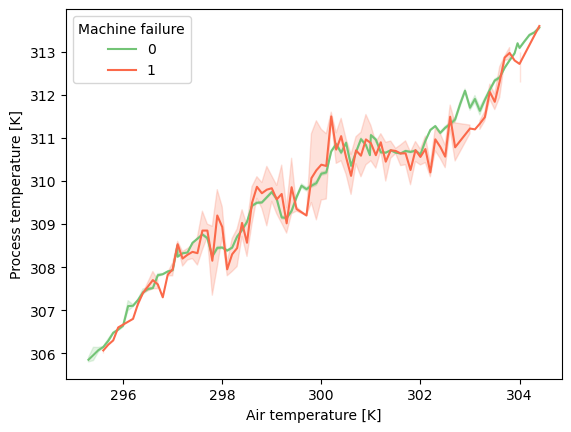

In [32]:
sns.lineplot(x = 'Air temperature [K]', y = 'Process temperature [K]',
             data = df_nmf, hue= 'Machine failure', palette='Greens')
sns.lineplot(x = 'Air temperature [K]', y = 'Process temperature [K]',
             data = df_mf, hue= "Machine failure", palette = 'Reds')
plt.show()

_Линия при сбое машины более ломаная_

**Обучение модели KNN**

In [33]:
df = pd.merge(df, pd.get_dummies(df['Type']), left_index= True, right_index=True)

In [34]:
df.head(3)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Fail,H,L,M
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0.0,0,1,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0.0,0,0,1
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0.0,0,1,0


In [35]:
X = df.drop(['id', 'Product ID', 'Type', 'Machine failure', 'TWF', 'HDF',
            'PWF', 'OSF', 'RNF'], axis = 1)
y = df['Machine failure']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scal = StandardScaler()
df_col = X.columns
X_train = scal.fit_transform(X_train)
X_test = scal.transform(X_test)

In [37]:
X_train = pd.DataFrame(X_train, columns=[df_col])
X_test = pd.DataFrame(X_test, columns=[df_col])

In [38]:
X_train.head(3)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Fail,H,L,M
0,0.503202,0.693469,-0.486166,0.361955,-1.628416,-0.114072,-0.265533,0.657528,-0.555756
1,-0.516203,-1.181064,-1.118120,-0.437920,-1.519084,-0.114072,-0.265533,0.657528,-0.555756
2,0.342243,1.414444,0.763378,-1.049590,1.542217,-0.114072,-0.265533,0.657528,-0.555756


***Кусок для kaggle***

In [39]:
from sklearn.metrics import roc_curve

In [40]:
#for i in range(3, 12):
#    knn = KNeighborsClassifier(n_neighbors=i)
#    knn.fit(X_train, y_train)
#    y_train_pred = knn.predict(X_train)
#    y_test_pred = knn.predict(X_test)
#    print('k = {0} | ROC_train:{1} | ROC_test:{2}'. format(i, roc_auc_score(y_train_pred, y_train),
#                                                          roc_auc_score(y_test_pred, y_test)))

In [41]:
#knn_3 = KNeighborsClassifier(n_neighbors=3)
#knn_3.fit(X_train, y_train)
#predd = knn_3.predict(X_test)
#fpr, tpr, thresholds = roc_curve(y_test, predd, pos_label=1)

In [42]:
#probba = knn_3.predict_proba(X_test)[:,1]

In [43]:
#predddd = knn_3.predict(X_test)

In [44]:
#roc_curve(predddd, probba)

In [45]:
df_tested = pd.read_csv("test.csv")
kgl_id = df_tested.id
df_tested

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [46]:
df_tested['Fail'] = 0
df_tested.loc[(df_tested.TWF+df_tested.HDF + df_tested.PWF + df_tested.OSF + df_tested.RNF)<1, 'Fail'] = 0
df_tested.loc[(df_tested.TWF+df_tested.HDF + df_tested.PWF + df_tested.OSF + df_tested.RNF)==1, 'Fail'] = 1
df_tested.loc[(df_tested.TWF+df_tested.HDF + df_tested.PWF + df_tested.OSF + df_tested.RNF)>1, 'Fail'] = 2
df_tested.loc[(df_tested.TWF==0)&(df_tested.HDF==0)&(df_tested.PWF ==0)&(df_tested.OSF ==0)&(df_tested.RNF==1), 'Fail']=0.5

In [47]:
df_tested = pd.merge(df_tested, pd.get_dummies(df_tested['Type']), left_index= True, right_index=True)

In [48]:
X_kaggle = df_tested.drop(['id', 'Product ID', 'Type', 'TWF', 'HDF',
            'PWF', 'OSF', 'RNF'], axis = 1)
X_kaggle = scal.transform(X_kaggle)
X_kaggle = pd.DataFrame(X_kaggle, columns=[df_col])

In [49]:
X_kaggle

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Fail,H,L,M
0,1.307995,1.126054,-0.155827,-0.273240,-0.691283,-0.114072,-0.265533,0.657528,-0.555756
1,0.986078,0.765567,1.380969,-1.355424,-1.362895,-0.114072,-0.265533,0.657528,-0.555756
2,0.771466,0.332982,0.030887,-0.308529,-0.129003,-0.114072,-0.265533,0.657528,-0.555756
3,0.127631,-0.243797,-0.299453,0.855995,-1.550322,-0.114072,-0.265533,-1.520849,1.799351
4,1.898177,1.702834,-0.040926,0.114934,0.152136,-0.114072,-0.265533,-1.520849,1.799351
...,...,...,...,...,...,...,...,...,...
90949,1.307995,1.053957,-0.263546,0.009069,-1.394133,-0.114072,-0.265533,0.657528,-0.555756
90950,-1.052732,-0.099602,0.152969,-0.767281,-1.144231,-0.114072,-0.265533,0.657528,-0.555756
90951,-2.286749,-2.695110,-0.141464,0.126697,1.292315,-0.114072,-0.265533,0.657528,-0.555756
90952,-0.945427,-1.541551,0.095518,-0.002694,-0.550713,-0.114072,-0.265533,0.657528,-0.555756


In [50]:
knn_kgl = KNeighborsClassifier(n_neighbors=7)
knn_kgl.fit(X_train, y_train)
pred_kaggle = knn_kgl.predict(X_kaggle)
proba_kaggle = knn_kgl.predict_proba(X_kaggle)[:, 1]

In [51]:
#data = {'id':kgl_id, 'Machine failure':proba_kaggle}
#submission = pd.DataFrame(data)
#submission = submission.round(decimals=1)
#submission.to_csv("submission.csv", index=False)

**SVC**

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV



In [62]:
df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Fail,H,L,M
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0.0,0,1,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0.0,0,0,1
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0.0,0,1,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0.0,0,1,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0,0.0,0,0,1
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0,0.0,1,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0,0.0,0,1,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0,0.0,0,1,0


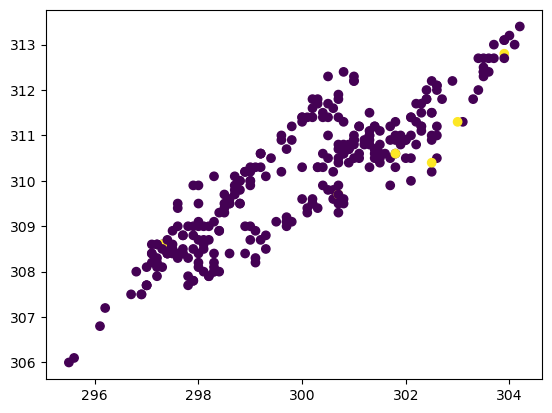

In [65]:
plt.scatter(df['Air temperature [K]'][:300], df['Process temperature [K]'][:300], c = df['Machine failure'][:300])

In [78]:
svc = SVC(kernel = 'rbf')

In [82]:
#prams = {'C': [1, 5, 10],
#        'gamma': [0.0005, 0.001, 0.005]}
#gds = GridSearchCV(svc, param_grid= prams)

In [ ]:
#gds.fit(X_train, y_train)

_У меня от подбора параметров знатно офигел ноут, сперва он высадил в 0 батарею, а потом, когда кол-во параметров уменьшил, пыжился минут 15, но так ничего и не высчитал, поэтому все оставил по дефолту, а то если сгорит бедолага, то я до конца отпуска останусь без компа_ 😢

In [84]:
svc.fit(X_train, y_train)

SVC()

In [86]:
pred_svc = svc.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [89]:
accuracy_score(y_test, pred_svc)

0.9963839820176403

In [90]:
confusion_matrix(y_test, pred_svc)

array([[40271,     4],
       [  144,   510]], dtype=int64)

_На самом деле, результат достаточно плохой, ведь получилось 144 ошибки второго класса, а это 22% из всех объектов данного класса_

In [95]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40275
           1       0.99      0.78      0.87       654

    accuracy                           1.00     40929
   macro avg       0.99      0.89      0.94     40929
weighted avg       1.00      1.00      1.00     40929



_Ну и соответветственно рекол по 1 сразу сообщает о большом колличестве ошибок 2го класса_

**Вывод**

_ В том, что машина ошиблась с определениями выхода из строя, нет ничего удивительного, ведь еще в EDA было видно, что некоторые параметры у вышедших из строя и продолживших свою работу машин абсолютно идентичны. Аккураси показал хороший результат, но сама модель достаточно плохо определяет ошибки именно самого важного, второго порядка_